In [117]:
from __future__ import division
import numpy as np
import pylab as plt
import scipy.optimize as op
from scipy.integrate import odeint
from scipy.integrate import nquad
%matplotlib inline

In [118]:
#length in cm, Density in GeV/cm^3

#Milky Way
"""
r_s = 20 * 3.08567758e19 # cm
rho_0 = 0.4 # GeV/cm^3
a = 0.2

def DM_density_NFW(rho_0, r_s, r):
    print(rho_0 / ((r / r_s) * (1 + (r / r_s))**2 ))
    
def DM_density_BURK(rho_0, r_s, r):
    print(rho_0 / ((1 + r / r_s) * (1 + (r / r_s )**2)))
    
def DM_denisty_EIN(rho_0, r_s, a, r):
    print(rho_0 * exp(-(2 / a) * ((r/r_s)**a - 1)))
"""

'\nr_s = 20 * 3.08567758e19 # cm\nrho_0 = 0.4 # GeV/cm^3\na = 0.2\n\ndef DM_density_NFW(rho_0, r_s, r):\n    print(rho_0 / ((r / r_s) * (1 + (r / r_s))**2 ))\n    \ndef DM_density_BURK(rho_0, r_s, r):\n    print(rho_0 / ((1 + r / r_s) * (1 + (r / r_s )**2)))\n    \ndef DM_denisty_EIN(rho_0, r_s, a, r):\n    print(rho_0 * exp(-(2 / a) * ((r/r_s)**a - 1)))\n'

In [119]:
def DM_density_NFW(r, rho_0, r_s, square=False):
    rho = rho_0 / ((r / r_s) * (1 + (r / r_s))**2 )
    if (square!=True):
        return rho
    else:
        return rho**2
    
def DM_density_BURK(r, rho_0, r_s, square=False):
    rho =  rho_0 / ((1 + r / r_s) * (1 + (r / r_s )**2))
    if (square!=True):
        return rho
    else:
        return rho**2
    
def DM_density_EIN(r, rho_0, r_s, a, square=False):
    rho = rho_0 * np.exp(-(2 / a) * ((r/r_s)**a - 1))
    if (square!=True):
        return rho
    else:
        return rho**2

def DM_density_GNFW(r, rho_0, r_s, gamma, square=False):
    rho = rho_0/((r/r_s)**gamma*(1+(r/r_s))**(3-gamma))
    if (square!=True):
        return rho
    else:
        return rho**2
    
    
# General DM density function
def DM_density(TYPE, r, rho_0, r_s, gamma=1, a=1, square=False):
    if ((TYPE=="NFW") or (TYPE=="nfw")):
        return DM_density_NFW(r, rho_0, r_s, square=False)
    elif ((TYPE=="Burk") or (TYPE=="Burkert") or (TYPE=="BURK")):
        return DM_density_BURK(r, rho_0, r_s, square=False)
    elif ((TYPE=="Ein") or (TYPE=="EIN") or (TYPE=="Einasto")):
        return DM_density_EIN(r, rho_0, r_s, a, square=False)
    elif ((TYPE=="GNFW") or (TYPE=="gnfw")):
        return DM_density_GNFW(r, rho_0, r_s, gamma, square=False)   
    else:
        print("Error: \tdensity profile TYPE was not recognized. Returned -1.")
        print("\tPlease specify either of the following profile TYPEs:")
        print("\t\t-\"NFW\" for Navarro-Frenk-White profile")
        print("\t\t-\"Burk\" for Burkert profile")
        print("\t\t-\"Ein\" for Einasto profile")
        print("\t\t-\"GNFW\" for generalized Navarro-Frenk-White profile")
        return -1
        
        

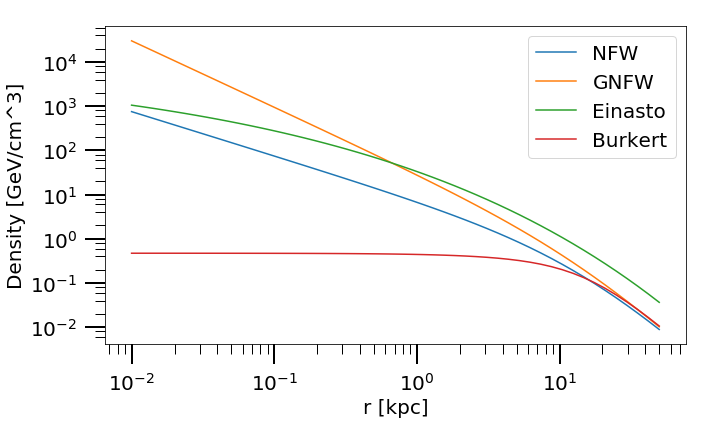

In [120]:
# Distance in cm
# Density in GeV/cm^3
# kpc in cm 3,086e+21
kpc_to_cm=3.086e+21

# Milky Way parameters
rho_0 = 0.471 # GeV/cm^3
r_s = 16*kpc_to_cm # cm
d = 8.5 * kpc_to_cm # cm

#  A range of input radii
r=np.logspace(np.log10(0.01*kpc_to_cm), np.log10(50*kpc_to_cm), 50)

'''
density_NFW=DM_density_NFW(r, rho_0=0.4, r_s=20*kpc_to_cm)
density_GNFW=DM_density_GNFW(r, rho_0=0.4, r_s=20*kpc_to_cm, gamma=1.5)
density_EIN=DM_denisty_EIN(r, rho_0=0.4, r_s=20*kpc_to_cm, a=0.2)
density_BURK=DM_density_BURK(r, rho_0=0.4, r_s=20*kpc_to_cm)
'''

a_lst = [1,1,0.2,1]
gamma_lst = [1, 1.5, 1, 1]
typelst = ["NFW", "GNFW", "Einasto", "Burkert"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for i in range(4):
    density = DM_density(typelst[i], r, rho_0, r_s, gamma_lst[i], a_lst[i])
    ax.plot(r/kpc_to_cm, density, label=typelst[i])
ax.set_xlabel(r"r [kpc]", fontsize=20)
ax.set_ylabel(r"Density [GeV/cm^3]", fontsize=20)
ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_title("Compton scattered spectrum $E_{photon,in}=$"+str(e_in))
ax.tick_params('both', labelsize=20, length=20, width=2, which='major', pad=8)
ax.tick_params('both', labelsize=20, length=10, width=1, which='minor',pad=8)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

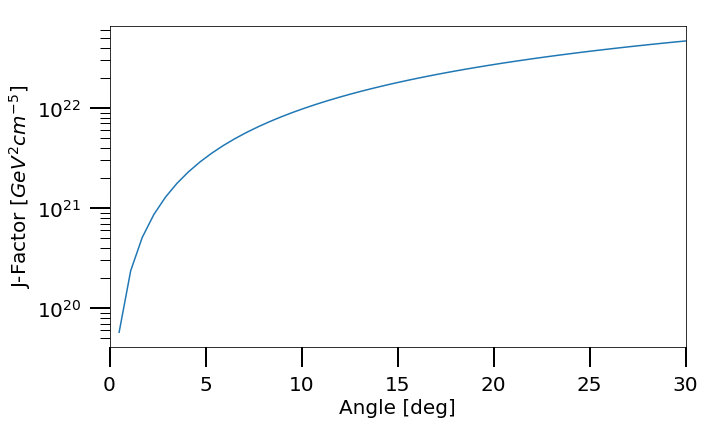

J-factor: 7.431856364202497e+21 GeV^2/cm^5


In [121]:
# Allows for computation of the dark matter density along the line of 
# sight. Parameters:
#     - l: the line of sight distance into the dark matter halo
#     - mu: the cosine of the viewing angle w.r.t. the galactic center
def DM_density_LOS(l, mu, d=8.5*kpc_to_cm, rho_0=0.471, r_s = 16*kpc_to_cm,
                   gamma=1, a=1, square=True, Type="NFW"):
    r = np.sqrt(l**2 + d**2 - 2*l*d*mu)
    return DM_density(Type, r, rho_0, r_s, gamma, a, square)

# Compute the J-factors
angle = np.linspace(0.5,30,50) # deg
J_factor, D_factor = [], []
for theta in angle:
    theta *= (np.pi / 180) # Conversion to rad
    result1 = nquad(DM_density_LOS, [[0,2*d],[np.cos(theta),1]],
                    args=(d, rho_0, r_s))
    J_factor.append(2*np.pi * result1[0])
    
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(angle, J_factor, label="NFW")
ax.set_xlabel("Angle [deg]", fontsize=20)
ax.set_ylabel(r"J-Factor [$GeV^2 cm^{-5}$]", fontsize=20)
ax.set_yscale("log")
ax.set_xlim([0,30])
#ax.set_title("Compton scattered spectrum $E_{photon,in}=$"+str(e_in))
ax.tick_params('both', labelsize=20, length=20, width=2, which='major', pad=8)
ax.tick_params('both', labelsize=20, length=10, width=1, which='minor',pad=8)

plt.tight_layout()
plt.show()
    

print("J-factor:", result1[0], "GeV^2/cm^5")

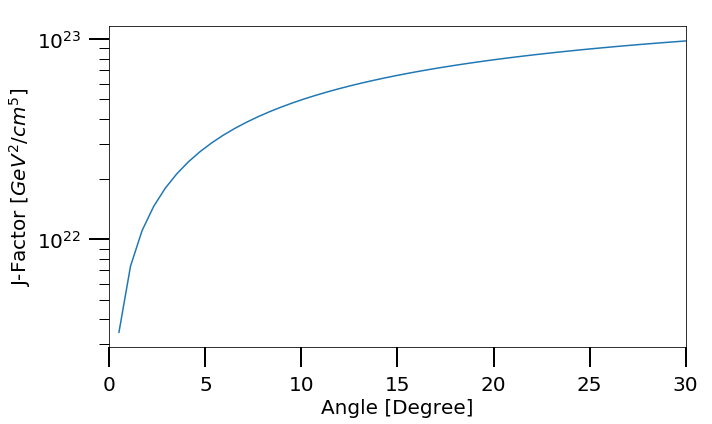

J-factor: 9.792863805998023e+22 GeV^2/cm^5


In [122]:
def DM_density_NFW(l,mu):
    rho_0 = 0.471 # GeV/cm^3
    r_s = 16 * kpc_to_cm #cm
    d = 8.5 * kpc_to_cm
    r = (l**2 + d**2 - 2*l*d*mu)**0.5
    return 2*np.pi*(rho_0 / ((r / r_s) * (1 + (r / r_s))**2))**2


d = 8.5 * kpc_to_cm

angle = np.linspace(0.5,30,50)
J_factor = []

for i in angle:
    thetha = (np.pi / 180 ) * i #radian
    result1 = nquad(DM_density_NFW, [[0,2*d],[np.cos(thetha),1]])
    J_factor.append(result1[0])

    
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(angle, J_factor, label="NFW")
ax.set_xlabel("Angle [Degree]", fontsize=20)
ax.set_ylabel(r"J-Factor [$GeV^2/cm^5$]", fontsize=20)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0,30])
#ax.set_title("Compton scattered spectrum $E_{photon,in}=$"+str(e_in))
ax.tick_params('both', labelsize=20, length=20, width=2, which='major', pad=8)
ax.tick_params('both', labelsize=20, length=10, width=1, which='minor',pad=8)

plt.tight_layout()
plt.show()
    

print("J-factor:", result1[0], "GeV^2/cm^5")